In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#Load the data into a DataFrame
data = pd.read_csv('churn_raw_data.csv')

In [3]:
#Assess data types and null values
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [4]:
#Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [5]:
#Check for duplicates
duplicate_values =data.duplicated()
print(duplicate_values.value_counts())

False    10000
Name: count, dtype: int64


In [6]:
#impute Missing Data
data['Age'].fillna(data['Age'].mean(), inplace = True)
data['Children'].fillna(data['Children'].median(), inplace = True)
data['Income'].fillna(data['Income'].median(), inplace = True)
data['Tenure'].fillna(data['Tenure'].median(), inplace = True)
data['Bandwidth_GB_Year'].fillna(data['Bandwidth_GB_Year'].median(), inplace = True)
data['Techie']= data['Techie'].fillna(data['Techie'].mode()[0])
data['InternetService']= data['InternetService'].fillna(data['InternetService'].mode()[0])
data['Phone']= data['Phone'].fillna(data['Phone'].mode()[0])
data['TechSupport']= data['TechSupport'].fillna(data['TechSupport'].mode()[0])

In [7]:
#Format
data['Age'] = data['Age'].fillna(0).astype(int)
data['Lng'] = data['Lng'].fillna(0).abs()

In [8]:
#Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

In [9]:
#Categorical Columns to Numeric
categorical_columns = ['Techie','Port_modem','Churn','OnlineSecurity','DeviceProtection', 'TechSupport', 'PaperlessBilling', 'Tablet', 'Phone', 'Multiple', 'OnlineBackup', 'StreamingTV', 'StreamingMovies']
for column in categorical_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

In [10]:
area_mapping = {'Urban': 0,'Suburban': 1,'Rural': 2}
employment_mapping = {'Part Time': 0,'Retired': 1,'Student': 2,'Full Time': 3,'Unemployed': 4}
marital_mapping = {'Widowed': 0,'Married': 1,'Separated': 2,'Never Married': 3,'Divorced' :4}
gender_mapping = {'Male':0,'Female': 1,'Prefer not to answer': 2}
contract_mapping = {'One year': 0,'Month-to-month': 1,'Two Year': 2}
InternetService_mapping = {'DSL': 0,'Fiber Optic': 1,'None': 2}
PaymentMethod_mapping = {'Bank Transfer(automatic)': 0,'Credit Card (automatic)': 1,'Mailed Check': 2, 'Electronic Check': 3}



data['Area'] = data['Area'].map(area_mapping)
data['Employment'] = data['Employment'].map(employment_mapping)
data['Marital'] = data['Marital'].map(marital_mapping)
data['Gender'] = data['Gender'].map(gender_mapping)
data['Contract'] = data['Contract'].map(contract_mapping)
data['InternetService'] = data['InternetService'].map(InternetService_mapping)
data['PaymentMethod'] = data['PaymentMethod'].map(PaymentMethod_mapping)

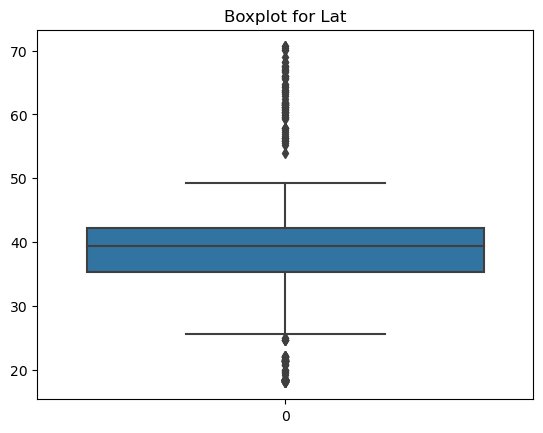

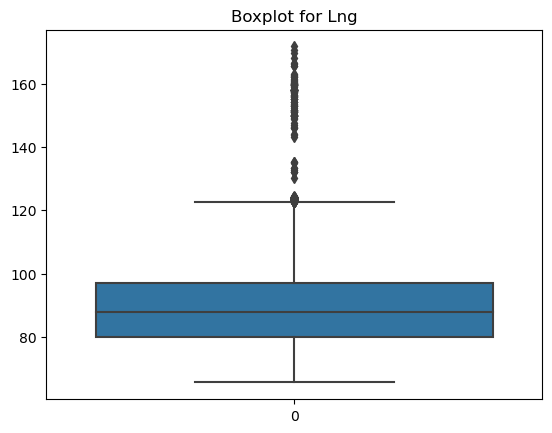

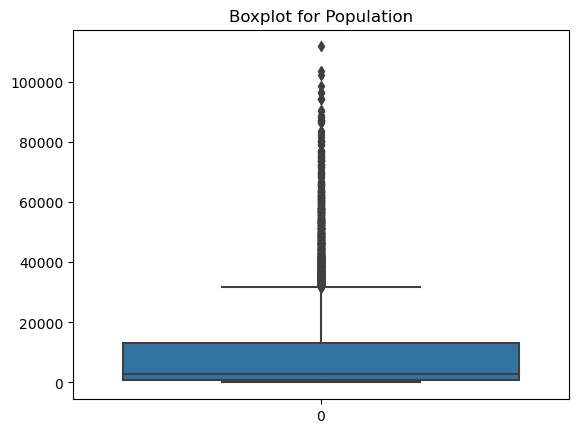

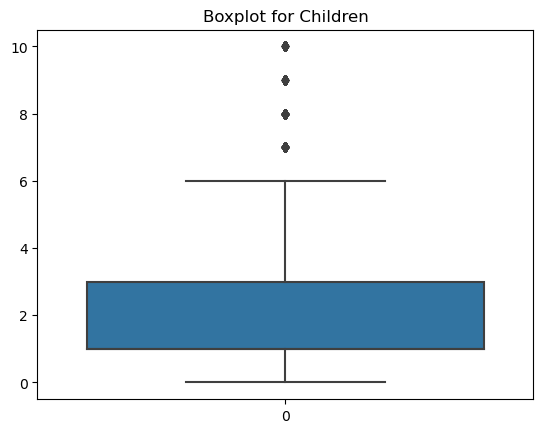

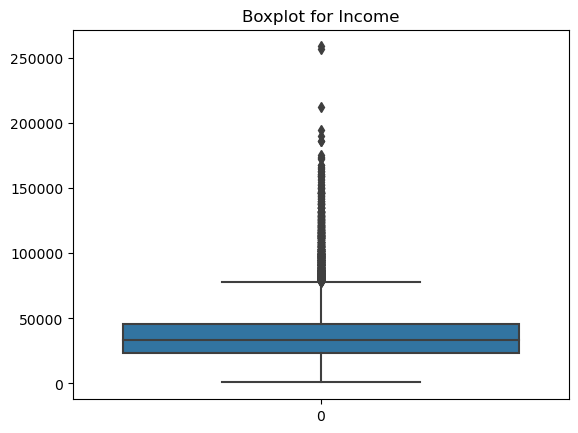

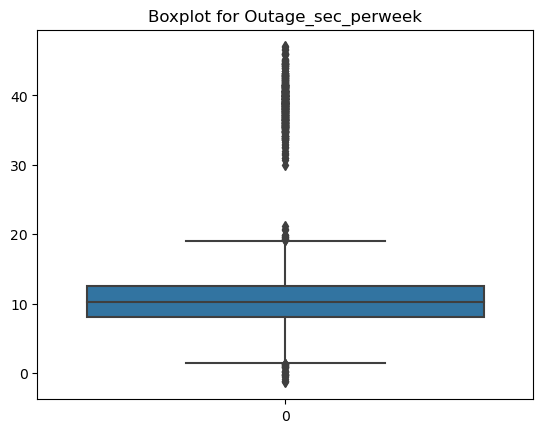

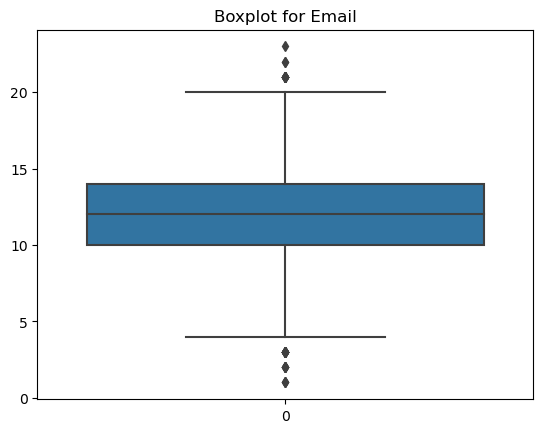

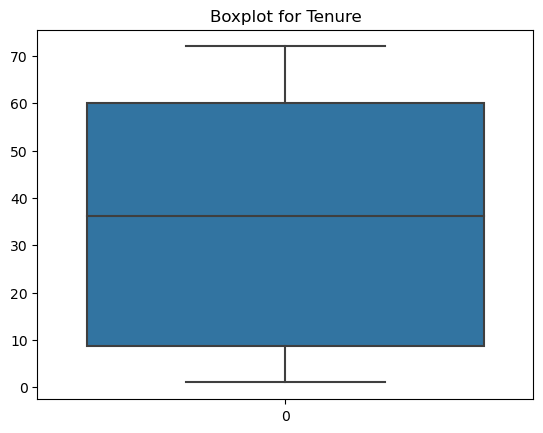

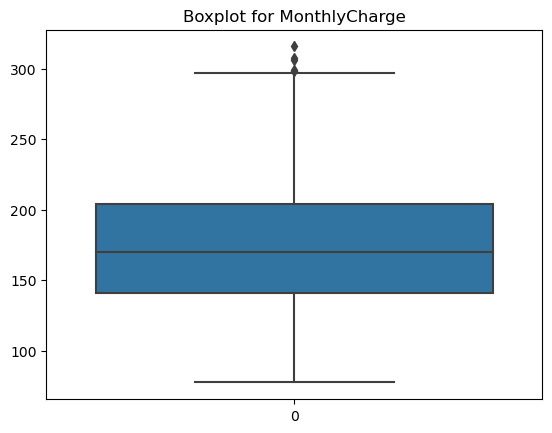

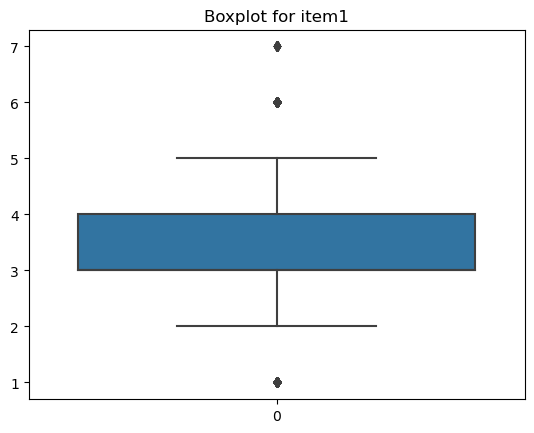

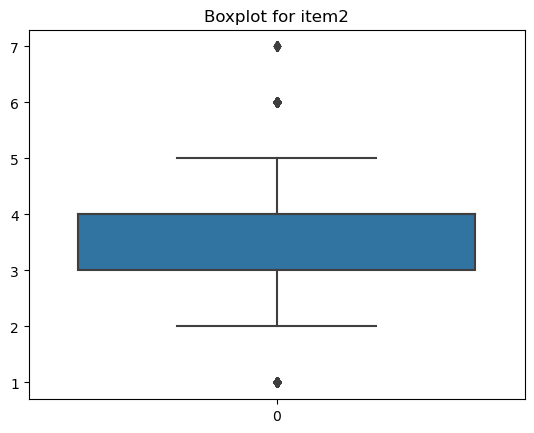

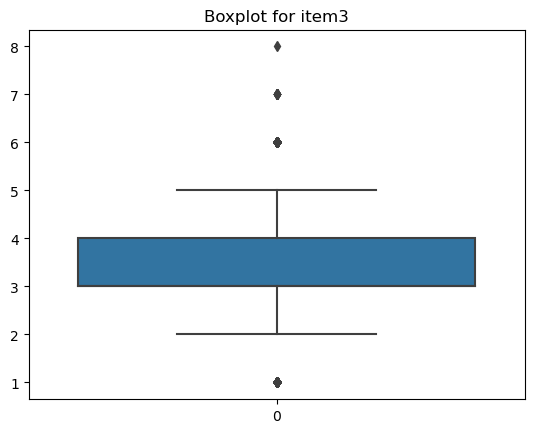

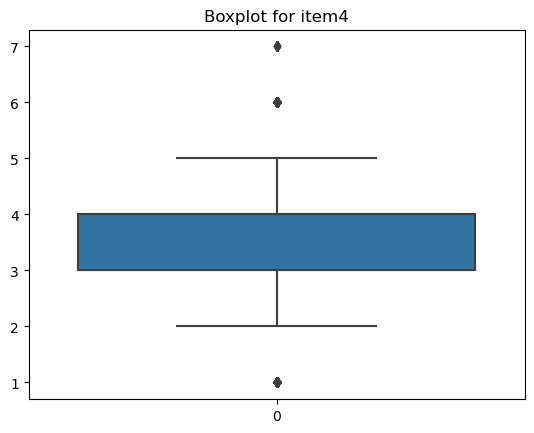

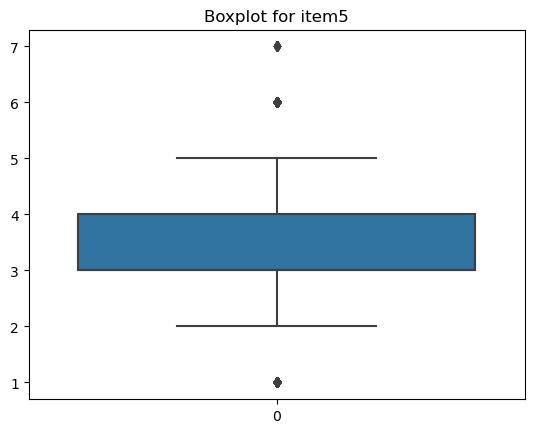

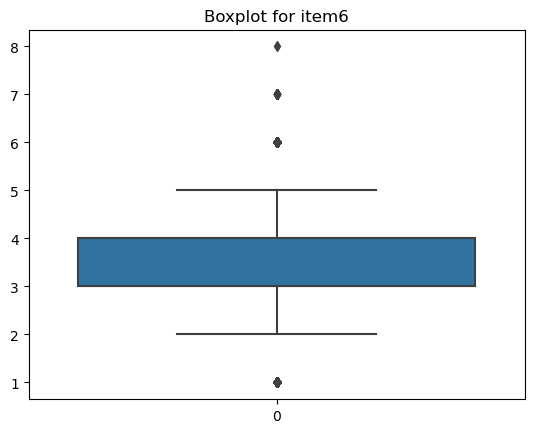

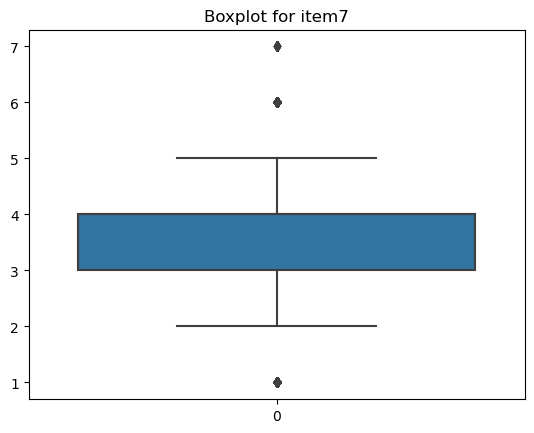

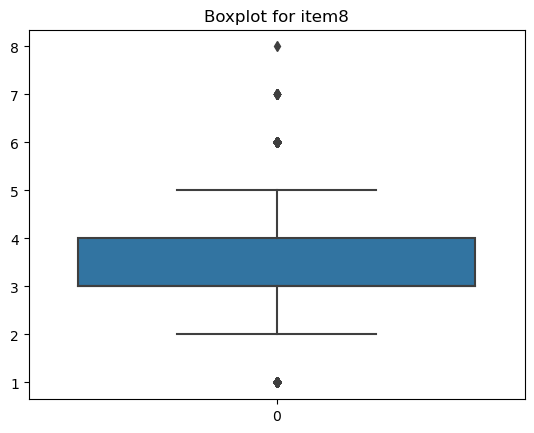

Outliers in Lat: 158
Outliers in Lng: 273
Outliers in Population: 937
Outliers in Children: 451
Outliers in Income: 759
Outliers in Outage_sec_perweek: 539
Outliers in Email: 38
Outliers in Tenure: 0
Outliers in MonthlyCharge: 5
Outliers in item1: 442
Outliers in item2: 445
Outliers in item3: 418
Outliers in item4: 433
Outliers in item5: 422
Outliers in item6: 413
Outliers in item7: 454
Outliers in item8: 426


In [11]:
#Determine Outliers
columns_to_plot = [ 'Lat', 'Lng','Population','Children','Income', 'Outage_sec_perweek','Email', 'Tenure','MonthlyCharge', 'item1','item2','item3','item4','item5','item6','item7','item8']


outlier_counts={}


for column in columns_to_plot:
    seaborn.boxplot(data=data[column])
    plt.title(f"Boxplot for {column}")
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    outlier_counts[column] = num_outliers
    
    plt.show()
    # Print 
for column, count in outlier_counts.items():
    print(f"Outliers in {column}: {count}")

In [12]:
def remove_outliers(data, column_to_clean):
    Q1 = data[column_to_clean].quantile(0.25)
    Q3 = data[column_to_clean].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median value
    data[column_to_clean] = data[column_to_clean].apply(lambda x: data[column_to_clean].median() if x < lower_bound or x > upper_bound else x)

    print(f"Column: {column_to_clean}")
    print(f"Original Data Shape: {data.shape}\n")

    return data

# Apply the modified remove_outliers function to each column
columns_to_process = [
    'MonthlyCharge', 'Children', 'Lat', 'Lng', 'Population',
    'Income', 'Outage_sec_perweek', 'Email', 'Tenure',
    'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
    'item7', 'item8'
]

for column in columns_to_process:
    data = remove_outliers(data, column)


Column: MonthlyCharge
Original Data Shape: (10000, 52)

Column: Children
Original Data Shape: (10000, 52)

Column: Lat
Original Data Shape: (10000, 52)

Column: Lng
Original Data Shape: (10000, 52)

Column: Population
Original Data Shape: (10000, 52)

Column: Income
Original Data Shape: (10000, 52)

Column: Outage_sec_perweek
Original Data Shape: (10000, 52)

Column: Email
Original Data Shape: (10000, 52)

Column: Tenure
Original Data Shape: (10000, 52)

Column: item1
Original Data Shape: (10000, 52)

Column: item2
Original Data Shape: (10000, 52)

Column: item3
Original Data Shape: (10000, 52)

Column: item4
Original Data Shape: (10000, 52)

Column: item5
Original Data Shape: (10000, 52)

Column: item6
Original Data Shape: (10000, 52)

Column: item7
Original Data Shape: (10000, 52)

Column: item8
Original Data Shape: (10000, 52)



In [13]:
#Save Data to clean dataset
data.to_csv("churn_cleaned_dataset.csv", index=False)


In [14]:
# Check if data is clean
print(data.head())
missing_values = data.isnull().sum()
print(missing_values)

   Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0           1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1           2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2           3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3           4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4           5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

          City State                 County    Zip       Lat        Lng  ...  \
0  Point Baker    AK  Prince of Wales-Hyder  99927  39.39580   87.91880  ...   
1  West Branch    MI                 Ogemaw  48661  44.32893   84.24080  ...   
2      Yamhill    OR                Yamhill  97148  45.35589   87.91880  ...   
3      Del Mar    CA              San Diego  92014  32.96687  117.24798  ...   
4    Needville    TX              Fort Bend  77461  29.38012   95.80673  ...   

   MonthlyCharge  Bandwidth_GB_Year item1 item2  i

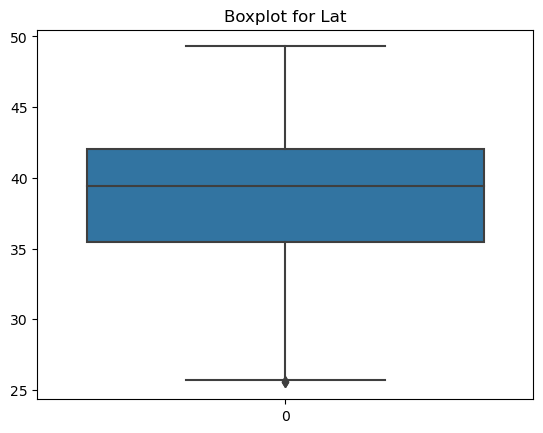

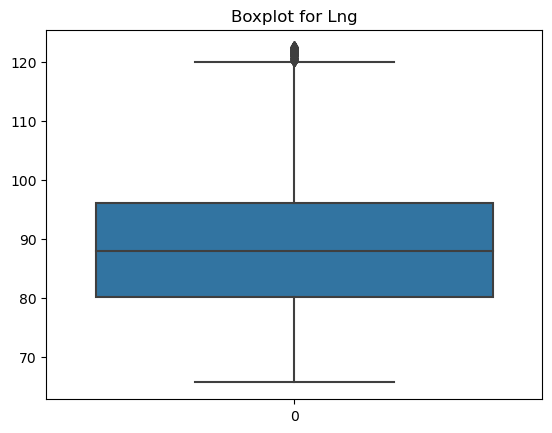

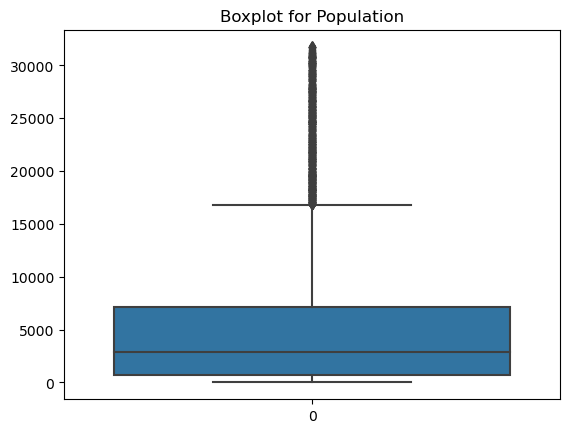

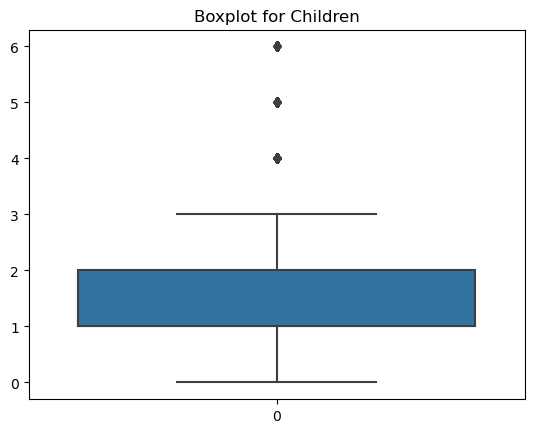

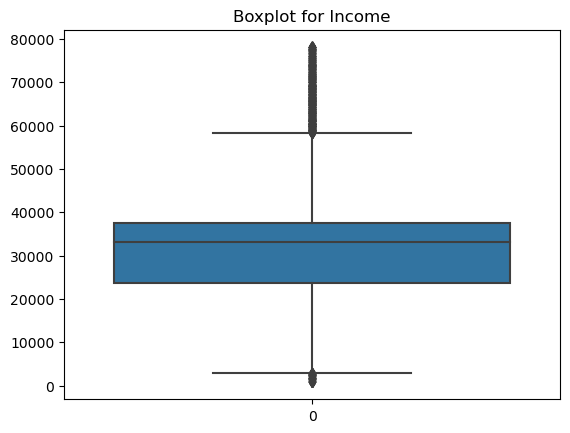

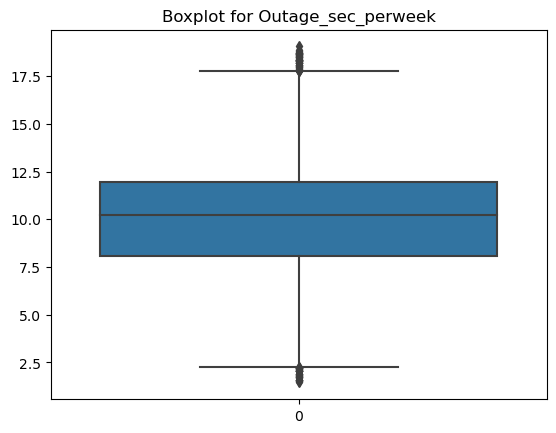

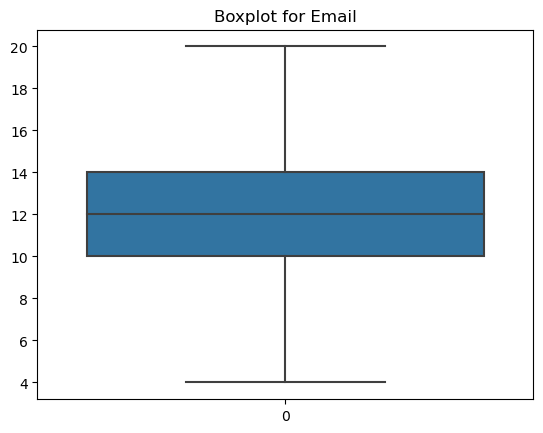

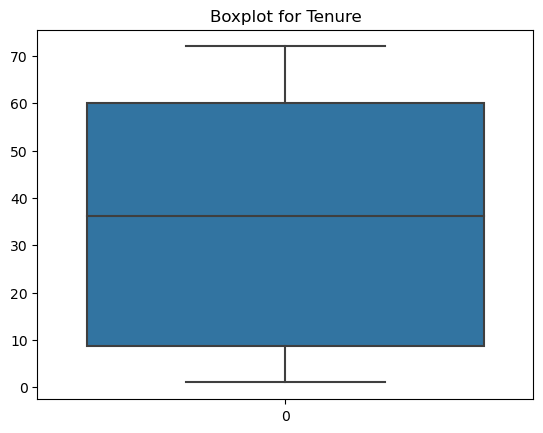

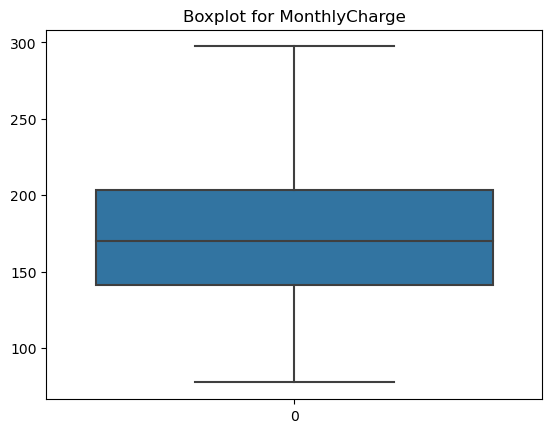

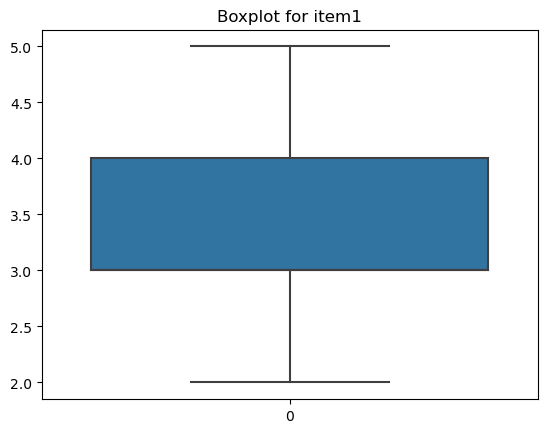

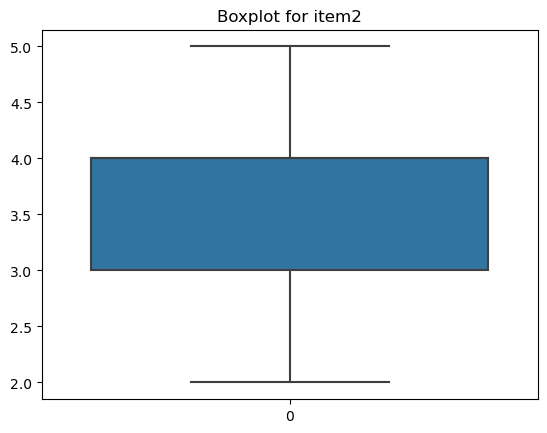

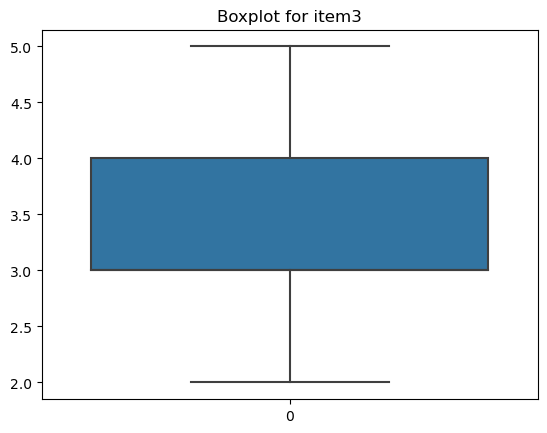

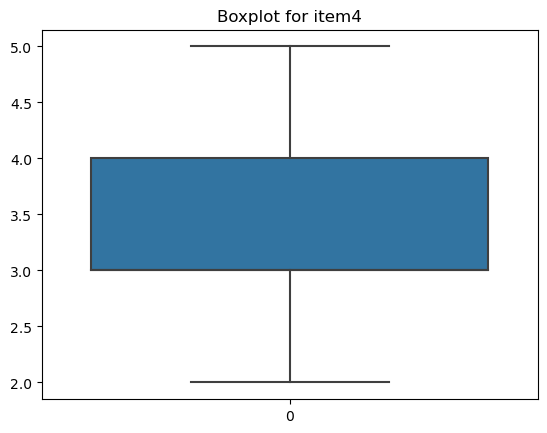

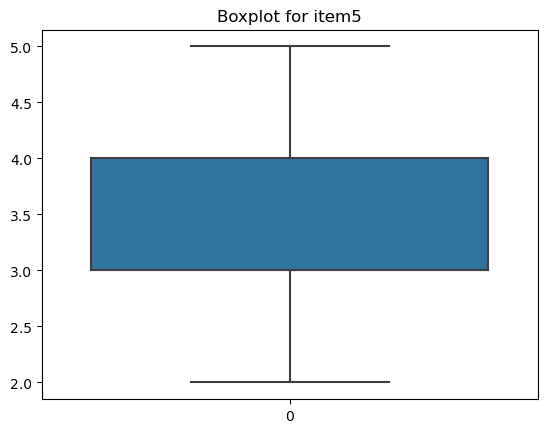

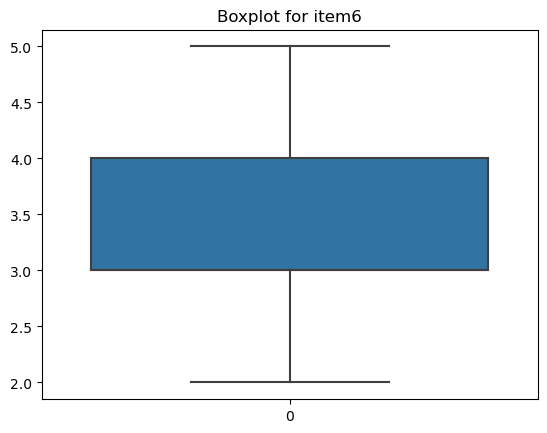

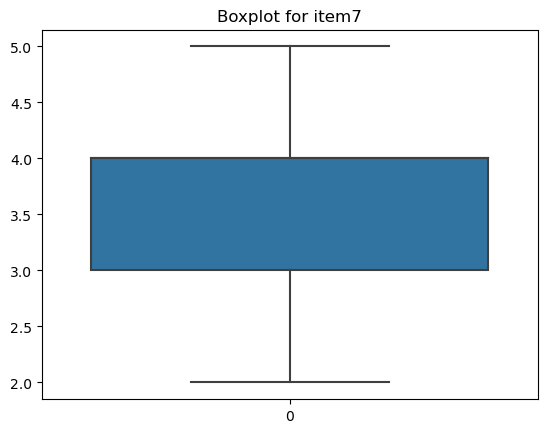

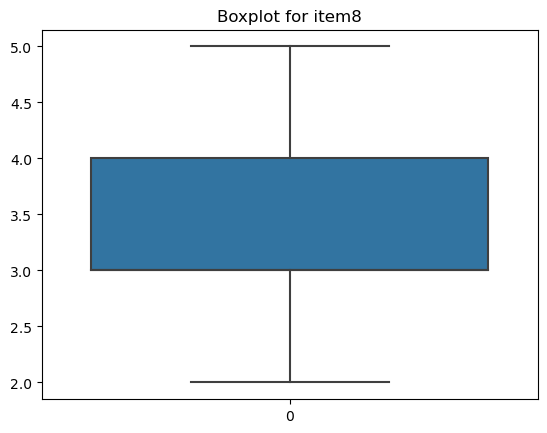

Outliers in Lat: 3
Outliers in Lng: 323
Outliers in Population: 1144
Outliers in Children: 1065
Outliers in Income: 864
Outliers in Outage_sec_perweek: 87
Outliers in Email: 0
Outliers in Tenure: 0
Outliers in MonthlyCharge: 0
Outliers in item1: 0
Outliers in item2: 0
Outliers in item3: 0
Outliers in item4: 0
Outliers in item5: 0
Outliers in item6: 0
Outliers in item7: 0
Outliers in item8: 0


In [15]:
#Look at Outlier Mods
columns_to_plot = [ 'Lat', 'Lng','Population','Children','Income', 'Outage_sec_perweek','Email', 'Tenure','MonthlyCharge', 'item1','item2','item3','item4','item5','item6','item7','item8']


outlier_counts={}


for column in columns_to_plot:
    seaborn.boxplot(data=data[column])
    plt.title(f"Boxplot for {column}")
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    outlier_counts[column] = num_outliers
    
    plt.show()
    # Print 
for column, count in outlier_counts.items():
    print(f"Outliers in {column}: {count}")

PCA Data Mean:
PC1   -1.203970e-15
PC2    7.582823e-18
PC3   -7.029932e-17
PC4   -7.378542e-17
dtype: float64

PCA Data Standard Deviation:
PC1    1.377000
PC2    1.007525
PC3    0.998251
PC4    0.994537
dtype: float64


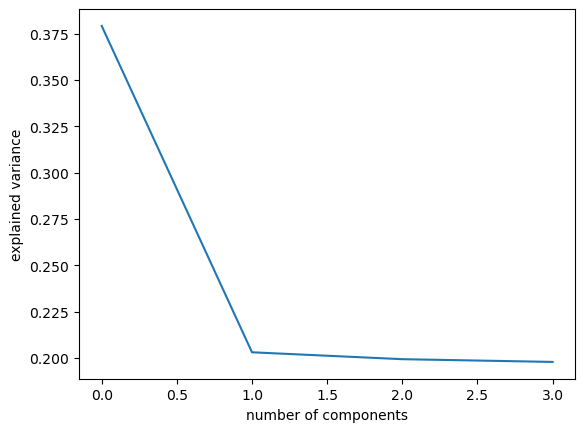

In [16]:
#PCA
data.head()
selected_columns=['Age', 'Children','Tenure','MonthlyCharge', 'Bandwidth_GB_Year']
#'Churn','OnlineSecurity', 'DeviceProtection','TechSupport', 'PaperlessBilling',

data= data[selected_columns]
data_normalized=(data-data.mean())/data.std()

n_components= 4

pca = PCA(n_components=n_components)
pca.fit(data_normalized)
data_pca = pd.DataFrame(pca.transform(data_normalized),
                        columns=['PC1','PC2','PC3','PC4'])
#,'PC4','PC5','PC6','PC7','PC8'
pca_mean = data_pca.mean()
pca_std = data_pca.std()

print("PCA Data Mean:")
print(pca_mean)

print("\nPCA Data Standard Deviation:")
print(pca_std)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [17]:
column_names = ['PC1', 'PC2', 'PC3', 'PC4'] 
#', 'PC6', 'PC7', 'PC8'
loadings = pd.DataFrame(pca.components_.T, columns=column_names, index=data.columns)

print("Feature Loadings on Principal Components:")
print(loadings)

Feature Loadings on Principal Components:
                        PC1       PC2       PC3       PC4
Age               -0.012341  0.646803  0.205391 -0.734044
Children          -0.011269  0.607285  0.443479  0.658868
Tenure             0.705525 -0.017013  0.060181 -0.031229
MonthlyCharge      0.044551  0.460959 -0.870339  0.160456
Bandwidth_GB_Year  0.707086  0.008898  0.005442  0.018739


[0.37922604 0.58224735 0.78154819 0.97936879]


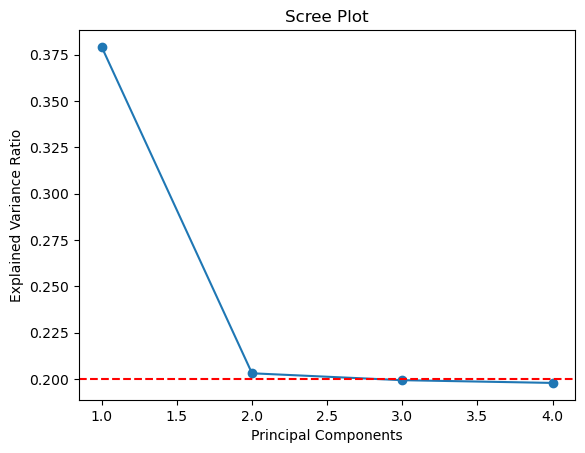

In [18]:
#ScreePlot
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance_ratio_cumsum)
explained_var = pca.explained_variance_ratio_
plt.plot(range(1, n_components + 1), explained_var, marker='o')
plt.axhline(y=0.20, color='r', linestyle='--', label='Threshold')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [19]:
summary_stats = data.describe()
print(summary_stats)

                Age      Children        Tenure  MonthlyCharge  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean      53.207500      1.499900     34.656864     174.008557   
std       18.003457      1.333333     25.182812      43.235651   
min       18.000000      0.000000      1.000259      77.505230   
25%       41.000000      1.000000      8.700329     141.071078   
50%       53.000000      1.000000     36.196030     169.906100   
75%       65.000000      2.000000     60.153487     203.705000   
max       89.000000      6.000000     71.999280     297.315800   

       Bandwidth_GB_Year  
count       10000.000000  
mean         3397.166397  
std          2072.718575  
min           155.506715  
25%          1312.130487  
50%          3382.424000  
75%          5466.284500  
max          7158.982000  


In [20]:
#Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Age                  0
Children             0
Tenure               0
MonthlyCharge        0
Bandwidth_GB_Year    0
dtype: int64


In [21]:
#Check Cleaniless

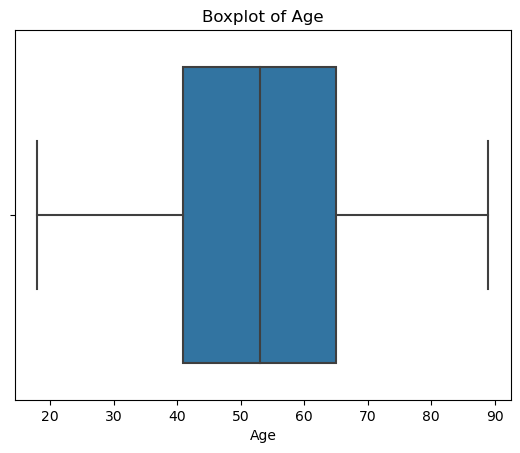

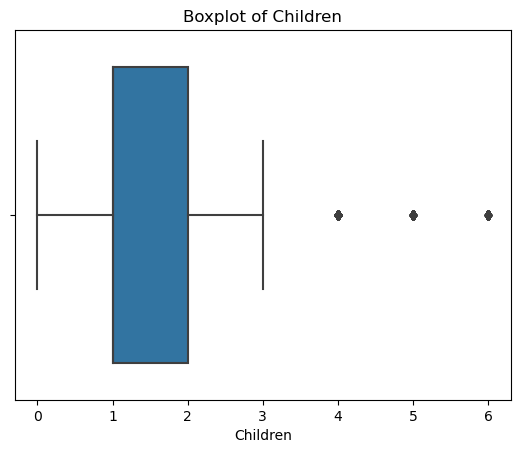

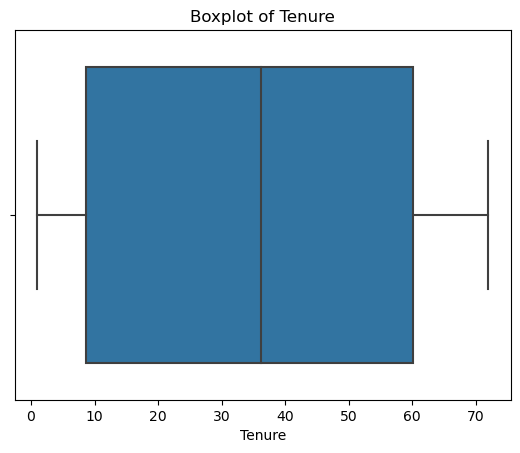

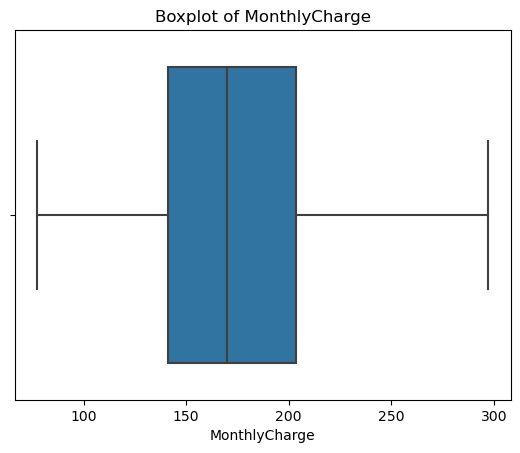

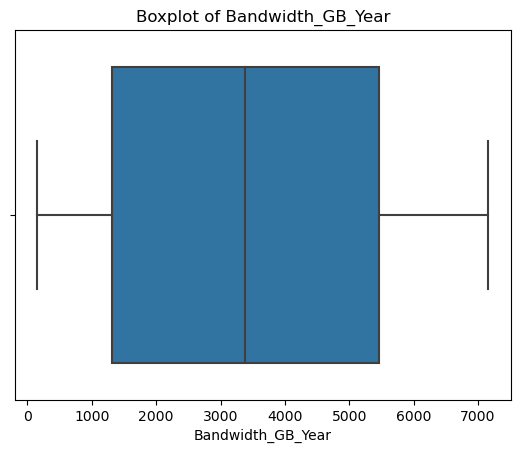

In [22]:
for column in data.columns:
    seaborn.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()